# Initial EDA
### Case Study 5, DAEN 400
October 31st, 2025

In [30]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Zillow data set

In [92]:
zillow_df = pd.read_csv('Zip_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv')

In [93]:
zillow_df = zillow_df[zillow_df['RegionName'] == 76065]

In [94]:
# Suppose your DataFrame is called zillow_df
# Identify the non-date columns (you said there are 9 of them)
non_date_cols = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 
                 'StateName', 'State', 'City', 'Metro', 'CountyName']

# Melt (unpivot) the DataFrame
zillow_df = zillow_df.melt(
    id_vars=non_date_cols,
    var_name='Date',
    value_name='ZHVI'
)

# Convert the Date column to datetime if needed
zillow_df['observation_date'] = pd.to_datetime(zillow_df['Date'], errors='coerce')

# Drop rows with NaN in Date (if there were any non-date columns that slipped in)
zillow_df = zillow_df.dropna(subset=['Date', 'ZHVI']).reset_index(drop=True)

# Convert to first day of each month
zillow_df['observation_date'] = zillow_df['observation_date'].dt.to_period('M').dt.to_timestamp()


In [95]:
zillow_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,ZHVI,observation_date
0,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-01-31,188438.751221,2009-01-01
1,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-02-28,188099.168468,2009-02-01
2,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-03-31,187923.385526,2009-03-01
3,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-04-30,187400.473974,2009-04-01
4,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2009-05-31,186960.172194,2009-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
196,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-05-31,453405.242441,2025-05-01
197,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-06-30,452048.962695,2025-06-01
198,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-07-31,450995.150491,2025-07-01
199,91223,1922,76065,zip,TX,TX,Midlothian,"Dallas-Fort Worth-Arlington, TX",Ellis County,2025-08-31,450762.653868,2025-08-01


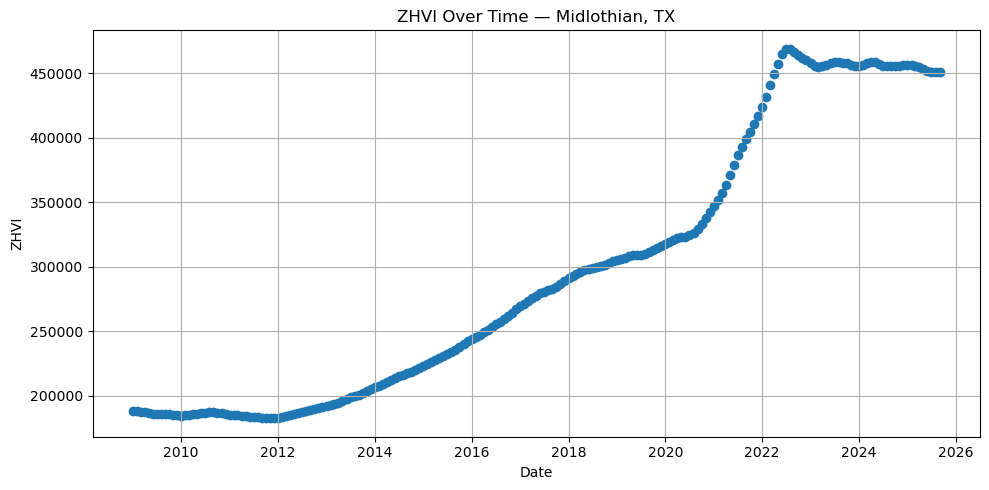

In [96]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.scatter(zillow_df['observation_date'], zillow_df['ZHVI'], marker='o')
plt.title(f"ZHVI Over Time — Midlothian, TX")
plt.xlabel("Date")
plt.ylabel("ZHVI")
plt.grid(True)
plt.tight_layout()
plt.show()


# Realtor.com data set

In [24]:
realtor_df = pd.read_csv('RDC_Inventory_Hotness_Metrics_Zip_History.csv')

In [81]:
realtor_df = realtor_df[realtor_df['postal_code'] == 76065]

def parse_date(row):
    year = str(row['month_date_yyyymm'])[0:4]
    month = str(row['month_date_yyyymm'])[4:]
    day = '01' # Default to first day of month

    date = '-'.join([year, month, day])
    
    return date

realtor_df['observation_date'] = realtor_df.apply(parse_date, axis=1)

# Type cast date
realtor_df['observation_date'] = pd.to_datetime(realtor_df['observation_date'])

# Sort chronilogicaly 
realtor_df = realtor_df.sort_values(by='observation_date')

In [83]:
realtor_df

,month_date_yyyymm,postal_code,zip_name,hh_rank,hotness_rank,hotness_rank_mm,hotness_rank_yy,hotness_score,supply_score,demand_score,...,page_view_count_per_property_yy,page_view_count_per_property_vs_us,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_vs_us,quality_flag,Date,MA,observation_date
304220,201708,76065,"midlothian, tx",1419,3674,3674,NaN,71.983755,61.824430,82.143080,...,NaN,1.479739,354118.25,0.010401,0.071657,1.287703,0,2017-08-01,NaN,2017-08-01
526105,201709,76065,"midlothian, tx",1419,4006,4006,NaN,70.734590,60.036076,81.433103,...,NaN,1.476040,357115.50,0.008464,0.092036,1.298602,0,2017-09-01,NaN,2017-09-01
142123,201710,76065,"midlothian, tx",1419,2665,2665,NaN,77.803030,72.279040,83.327020,...,NaN,1.527860,358999.50,0.005276,0.048174,1.305453,0,2017-10-01,NaN,2017-10-01
374731,201711,76065,"midlothian, tx",1419,4535,4535,NaN,67.255952,65.055810,69.456094,...,NaN,1.206123,360298.25,0.003618,0.047292,1.312825,0,2017-11-01,NaN,2017-11-01
990891,201712,76065,"midlothian, tx",1419,4858,4858,NaN,64.400775,50.063498,78.738052,...,NaN,1.430673,355673.00,-0.012837,0.016238,1.317795,0,2017-12-01,70.435621,2017-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27380,202505,76065,"midlothian, tx",1419,6116,6116,-1965.0,50.274874,40.758808,59.790941,...,0.116865,1.150152,539900.00,-0.009358,-0.002485,1.227045,0,2025-05-01,49.200437,2025-05-01
697061,202506,76065,"midlothian, tx",1419,6142,6142,-2588.0,50.860643,42.288034,59.433253,...,0.116202,1.143831,546000.00,0.011298,0.001835,1.238236,0,2025-06-01,51.444258,2025-06-01
897870,202507,76065,"midlothian, tx",1419,6408,6408,-2796.0,50.151582,40.128660,60.174505,...,0.264894,1.138221,539475.00,-0.011951,0.022701,1.227614,0,2025-07-01,50.406999,2025-07-01
816133,202508,76065,"midlothian, tx",1419,7617,7617,-2047.0,44.388385,31.970962,56.805808,...,0.298687,1.080314,540000.00,0.000973,0.028571,1.255843,0,2025-08-01,48.794595,2025-08-01


<Figure size 1000x500 with 0 Axes>

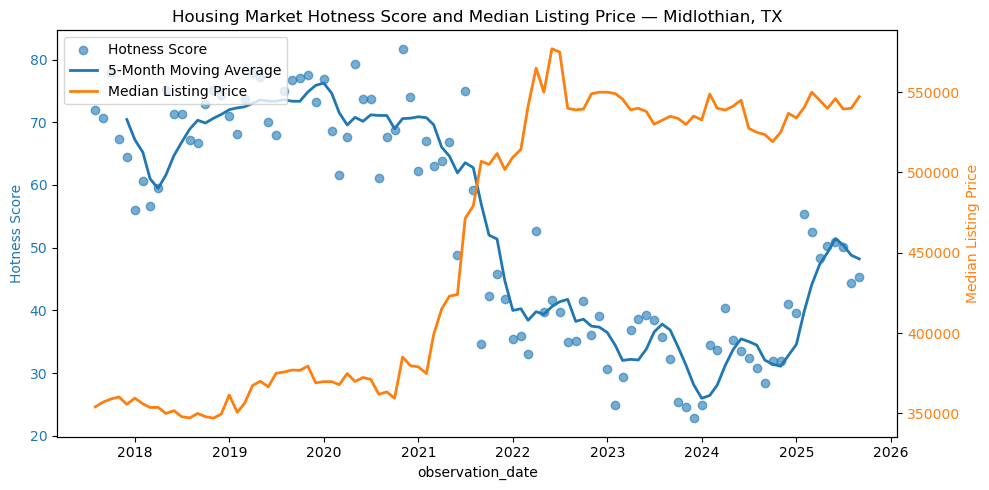

In [82]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# --- Left axis (Hotness Score) ---
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.scatter(realtor_df['observation_date'], realtor_df['hotness_score'], marker='o', alpha=0.6, label='Hotness Score', color='tab:blue')

# 5-month moving average
realtor_df['MA'] = realtor_df['hotness_score'].rolling(window=5).mean()
ax1.plot(realtor_df['observation_date'], realtor_df['MA'], linewidth=2, color='tab:blue', label='5-Month Moving Average')

ax1.set_xlabel("observation_date")
ax1.set_ylabel("Hotness Score", color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# --- Right axis (Median Listing Price) ---
ax2 = ax1.twinx()  # create secondary y-axis sharing the same x-axis
ax2.plot(realtor_df['observation_date'], realtor_df['median_listing_price'], color='tab:orange', linewidth=2, label='Median Listing Price')
ax2.set_ylabel("Median Listing Price", color='tab:orange')
ax2.tick_params(axis='y', labelcolor='tab:orange')

# --- Formatting ---
plt.title("Housing Market Hotness Score and Median Listing Price — Midlothian, TX")
fig.tight_layout()
plt.grid(True, which='major', axis='x', linestyle='--', alpha=0.7)

# --- Combined Legend ---
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()

# Load FRED data

In [ ]:
mortgage = pd.read_csv('30yrMortgageRates.csv')
fedFunds = pd.read_csv('FEDFUNDS.csv')
cpi = pd.read_csv('Median_CPI.csv')

In [64]:
# Convert columns to correct type
fedFunds['observation_date'] = pd.to_datetime(fedFunds['observation_date'])
cpi['observation_date'] = pd.to_datetime(cpi['observation_date'])

# Convert observation_date to datetime if it's not already
mortgage['observation_date'] = pd.to_datetime(mortgage['observation_date'])

# Create a year-month column for grouping
mortgage['year_month'] = mortgage['observation_date'].dt.to_period('M')

# Group by year-month and calculate mean
monthly_mortgage = mortgage.groupby('year_month')['MORTGAGE30US'].mean().reset_index()

# Convert year_month back to datetime (first day of month)
monthly_mortgage['observation_date'] = monthly_mortgage['year_month'].dt.to_timestamp()

# Drop the temporary year_month column
monthly_mortgage = monthly_mortgage.drop('year_month', axis=1)

# Combine all data

In [97]:
from functools import reduce

# List of dataframes to join
dataframes = [
    cpi, fedFunds, monthly_mortgage, 
    zillow_df[['observation_date', 'ZHVI']], 
    realtor_df[['observation_date', 'median_listing_price', 'hotness_score', 'supply_score', 'demand_score']]
]

# Join all dataframes on observation_date
combined_data = reduce(lambda left, right: pd.merge(left, right, on='observation_date', how='inner'), 
                      dataframes)

combined_data['cpi'] = combined_data['MEDCPIM158SFRBCLE']
combined_data['mortgage'] = combined_data['MORTGAGE30US']
combined_data.drop(columns=['MEDCPIM158SFRBCLE', 'MORTGAGE30US'], inplace=True)

In [98]:
combined_data

,observation_date,FEDFUNDS,ZHVI,median_listing_price,hotness_score,supply_score,demand_score,cpi,mortgage
0,2018-01-01,1.41,291146.124224,359513.25,55.959161,43.061536,68.856786,4.170000,4.0325
1,2018-02-01,1.42,292937.256418,355990.00,60.615309,47.533853,73.696766,2.013279,4.3300
2,2018-03-01,1.51,294455.789740,353725.00,56.707528,44.331325,69.083732,1.961900,4.4440
3,2018-04-01,1.69,295985.955408,353813.75,59.518286,47.659662,71.376910,2.932009,4.4675
4,2018-05-01,1.70,297367.026385,349990.00,75.104700,68.796118,81.413282,2.981833,4.5860
...,...,...,...,...,...,...,...,...,...
87,2025-04-01,4.33,454746.398462,545000.00,48.297491,42.310199,54.284783,3.980957,6.7250
88,2025-05-01,4.33,453405.242441,539900.00,50.274874,40.758808,59.790941,2.695123,6.8160
89,2025-06-01,4.33,452048.962695,546000.00,50.860643,42.288034,59.433253,4.084968,6.8175
90,2025-07-01,4.33,450995.150491,539475.00,50.151582,40.128660,60.174505,3.367945,6.7200
